In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('train.csv')

In [27]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
#xvars = ['YearBuilt', 'YearRemodAdd', '1stFlrSF', 'OverallQual', 'TotRmsAbvGrd', 'GarageArea', '2ndFlrSF', 'TotalBsmtSF']

#Get list of numeric variables using this command
#Exclude sale price because that's the target
#data.select_dtypes(['float64', 'int64']).columns


numeric_vars = [u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold']

#Remove these columns for now becuase they have nulls
for x in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    numeric_vars.remove(x)

#remove columns with null
#col_has_null = data_all.isnull().any(axis=0)
#col_has_null[col_has_null.values]

In [143]:
data_cat = data.select_dtypes(['object'])
data_numeric = data[numeric_vars]

In [144]:
data_all = pd.concat([pd.get_dummies(data_cat),data_numeric], axis=1)

In [145]:
X = data_all.values
y = data['SalePrice'].values

In [185]:
def get_mse(X, y, a):
    x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)


    regr = linear_model.Ridge(alpha = a, normalize=True)
    regr.fit(x_train, y_train)
    return np.sqrt(np.mean((np.log(regr.predict(x_validation) )- np.log(y_validation))** 2))

In [186]:
for a in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 10, 100]:
    print a, get_mse(X, y, a)

0.1 0.155258436607
0.2 0.15122828246
0.3 0.149036844674
0.4 0.147779816108
0.5 0.147075497205
0.6 0.146726711316
0.7 0.146620568239
0.8 0.146687796135
0.9 0.146883609102
1.0 0.147177809961
2 0.152752338366
3 0.160152797282
4 0.168010735799
5 0.17584707815
10 0.210207246103
100 0.344969256119


In [202]:
alpha_optimization_df = pd.DataFrame({'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5,2, 3, 4, 5, 10, 100]})
alpha_optimization_df['mse'] = alpha_optimization_df['alpha'].apply(lambda a: get_mse(X, y, a))
alpha_optimization_df.head()

,alpha,mse
0,0.1,0.155258
1,0.2,0.151228
2,0.3,0.149037
3,0.4,0.147780
4,0.5,0.147075


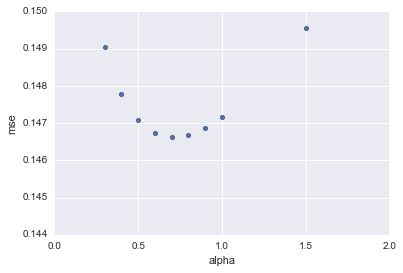

In [203]:
alpha_optimization_df.plot(x = 'alpha', y = 'mse', kind = 'scatter', xlim = [0, 2], ylim = [0.144, 0.15])

Looks like the best alpha is around 0.7.

In [206]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)

#regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha = 0.7, normalize=True)
regr.fit(x_train, y_train)
#print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print("Root Mean squared error: %.3f" % np.sqrt(np.mean((np.log(regr.predict(x_validation) )- np.log(y_validation))** 2)))

('Intercept: ', 144994.19985058773)
Root Mean squared error: 0.147


## Other Models

Let's try a few other models for fun.

In [180]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)

#regr = linear_model.LinearRegression()
regr = RandomForestRegressor(n_estimators=100, max_depth = 15, min_samples_split=20)
regr.fit(x_train, y_train)
#print('Coefficients: ', regr.coef_)
#print('Intercept: ', regr.intercept_)
print("Root Mean squared error: %.3f" % np.sqrt(np.mean((np.log(regr.predict(x_validation) )- np.log(y_validation))** 2)))

Root Mean squared error: 0.154


In [190]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)

GBest = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
GBest.fit(x_train, y_train)
print("Root Mean squared error: %.3f" % np.sqrt(np.mean((np.log(GBest.predict(x_validation) )- np.log(y_validation))** 2)))

Root Mean squared error: 0.138
